Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:

What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

Evaluate your in-sample results using the model score, confusion matrix, and classification report.

Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

Run through steps 2-4 using a different max_depth value.

Which model performs better on your in-sample data?

Which model performs best on your out-of-sample data, the validate set?



In [71]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import numpy as np

from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
import acquire

In [73]:
df = acquire.get_titanic_data()
df.head()

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [74]:
df = df.drop(['Unnamed: 0', 'passenger_id','pclass', 'deck', 'embarked'], axis=1)

In [75]:
dummy_df = pd.get_dummies(df[['sex', 'embark_town', 'class']], dummy_na=False, drop_first=[True, True, True])

In [76]:
df = pd.concat([dummy_df, df], axis=1)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sex_male                 891 non-null    uint8  
 1   embark_town_Queenstown   891 non-null    uint8  
 2   embark_town_Southampton  891 non-null    uint8  
 3   class_Second             891 non-null    uint8  
 4   class_Third              891 non-null    uint8  
 5   survived                 891 non-null    int64  
 6   sex                      891 non-null    object 
 7   age                      714 non-null    float64
 8   sibsp                    891 non-null    int64  
 9   parch                    891 non-null    int64  
 10  fare                     891 non-null    float64
 11  class                    891 non-null    object 
 12  embark_town              889 non-null    object 
 13  alone                    891 non-null    int64  
dtypes: float64(2), int64(4), o

In [78]:
df = df.drop(['sex', 'class','embark_town'], axis=1)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sex_male                 891 non-null    uint8  
 1   embark_town_Queenstown   891 non-null    uint8  
 2   embark_town_Southampton  891 non-null    uint8  
 3   class_Second             891 non-null    uint8  
 4   class_Third              891 non-null    uint8  
 5   survived                 891 non-null    int64  
 6   age                      714 non-null    float64
 7   sibsp                    891 non-null    int64  
 8   parch                    891 non-null    int64  
 9   fare                     891 non-null    float64
 10  alone                    891 non-null    int64  
dtypes: float64(2), int64(4), uint8(5)
memory usage: 46.2 KB


In [80]:
def train_validate_test_split(df, target, seed=123):
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed,
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3,
                                       random_state=seed,
                                       stratify=train_validate[target])
        
    return train, validate, test

In [81]:
train, validate, test = train_validate_test_split(df, target='survived')

In [82]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 583 to 744
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sex_male                 498 non-null    uint8  
 1   embark_town_Queenstown   498 non-null    uint8  
 2   embark_town_Southampton  498 non-null    uint8  
 3   class_Second             498 non-null    uint8  
 4   class_Third              498 non-null    uint8  
 5   survived                 498 non-null    int64  
 6   age                      401 non-null    float64
 7   sibsp                    498 non-null    int64  
 8   parch                    498 non-null    int64  
 9   fare                     498 non-null    float64
 10  alone                    498 non-null    int64  
dtypes: float64(2), int64(4), uint8(5)
memory usage: 29.7 KB


In [84]:
train.head()

,sex_male,embark_town_Queenstown,embark_town_Southampton,class_Second,class_Third,survived,age,sibsp,parch,fare,alone
583,1,0,0,0,0,0,36.0,0,0,40.1250,1
165,1,0,1,0,1,1,9.0,0,2,20.5250,0
50,1,0,1,0,1,0,7.0,4,1,39.6875,0
259,0,0,1,1,0,1,50.0,0,1,26.0000,0
306,0,0,0,0,0,1,NaN,0,0,110.8833,1


In [85]:
from sklearn.impute import SimpleImputer

In [86]:
imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
type(imputer)

imputer = imputer.fit(train[['age']])
train[['age']] = imputer.transform(train[['age']])

In [87]:
train['age'].isna().sum()

0

In [88]:
validate[['age']] = imputer.transform(validate[['age']])
test[['age']] = imputer.transform(test[['age']])

In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 583 to 744
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sex_male      498 non-null    uint8  
 1   class_Second  498 non-null    uint8  
 2   class_Third   498 non-null    uint8  
 3   survived      498 non-null    int64  
 4   sex           498 non-null    object 
 5   age           498 non-null    float64
 6   sibsp         498 non-null    int64  
 7   parch         498 non-null    int64  
 8   fare          498 non-null    float64
 9   class         498 non-null    object 
 10  embark_town   498 non-null    object 
 11  alone         498 non-null    int64  
dtypes: float64(2), int64(4), object(3), uint8(3)
memory usage: 40.4+ KB


In [29]:
# Baseline prediction is NOT SURVIVED as this is the mode of survived

In [89]:
baseline_accuracy = ((train.survived == False).sum() / len(train.survived))
baseline_accuracy

0.6164658634538153

In [90]:
X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

In [91]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 583 to 744
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sex_male                 498 non-null    uint8  
 1   embark_town_Queenstown   498 non-null    uint8  
 2   embark_town_Southampton  498 non-null    uint8  
 3   class_Second             498 non-null    uint8  
 4   class_Third              498 non-null    uint8  
 5   age                      498 non-null    float64
 6   sibsp                    498 non-null    int64  
 7   parch                    498 non-null    int64  
 8   fare                     498 non-null    float64
 9   alone                    498 non-null    int64  
dtypes: float64(2), int64(3), uint8(5)
memory usage: 25.8 KB


In [102]:
clf = DecisionTreeClassifier(max_depth=3, random_state=123)

In [103]:
clf = clf.fit(X_train, y_train)

[Text(558.0, 475.65000000000003, 'sex_male <= 0.5\ngini = 0.473\nsamples = 498\nvalue = [307, 191]'),
 Text(279.0, 339.75, 'class_Third <= 0.5\ngini = 0.365\nsamples = 175\nvalue = [42, 133]'),
 Text(139.5, 203.85000000000002, 'age <= 3.0\ngini = 0.081\nsamples = 94\nvalue = [4, 90]'),
 Text(69.75, 67.94999999999999, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(209.25, 67.94999999999999, 'gini = 0.062\nsamples = 93\nvalue = [3, 90]'),
 Text(418.5, 203.85000000000002, 'fare <= 23.912\ngini = 0.498\nsamples = 81\nvalue = [38, 43]'),
 Text(348.75, 67.94999999999999, 'gini = 0.476\nsamples = 69\nvalue = [27, 42]'),
 Text(488.25, 67.94999999999999, 'gini = 0.153\nsamples = 12\nvalue = [11, 1]'),
 Text(837.0, 339.75, 'fare <= 18.275\ngini = 0.295\nsamples = 323\nvalue = [265, 58]'),
 Text(697.5, 203.85000000000002, 'age <= 7.835\ngini = 0.184\nsamples = 205\nvalue = [184, 21]'),
 Text(627.75, 67.94999999999999, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(767.25, 67.94999999999999,

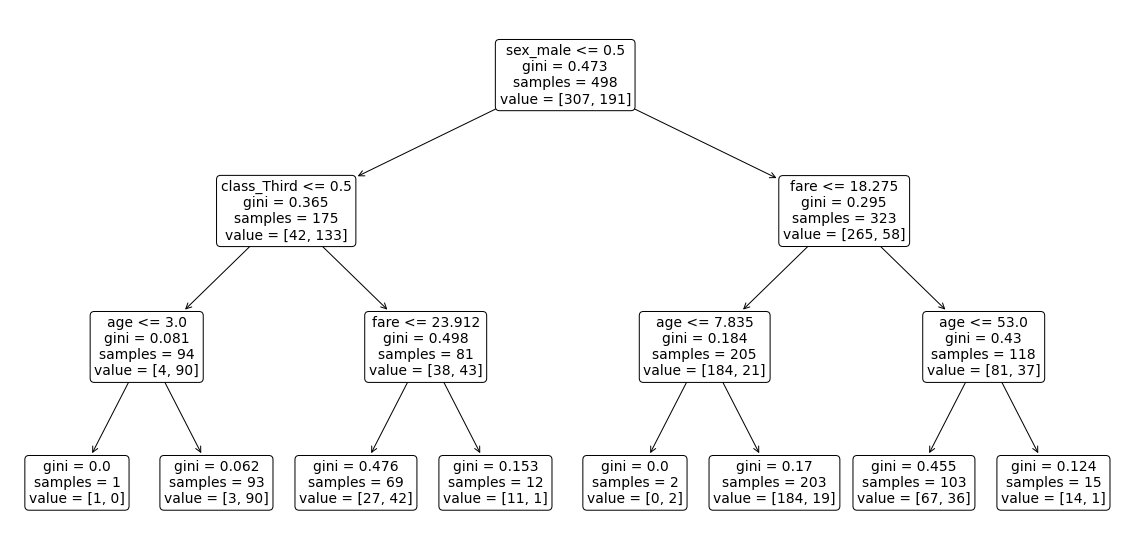

In [109]:
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X_train.columns, rounded=True)

In [110]:
y_pred = clf.predict(X_train)
y_pred[0:5]

array([0, 0, 0, 1, 1])

In [111]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.65048544, 0.34951456],
       [0.65048544, 0.34951456],
       [0.65048544, 0.34951456],
       [0.03225806, 0.96774194],
       [0.03225806, 0.96774194]])

In [112]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.83


In [113]:
confusion_matrix(y_train, y_pred)

array([[277,  30],
       [ 57, 134]])

In [114]:
y_train.value_counts()

0    307
1    191
Name: survived, dtype: int64

In [116]:
labels = sorted(y_train.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=['predict_died', 'predict_survived'], columns=['actual_died', 'actual survived'])

,actual_died,actual survived
predict_died,277,30
predict_survived,57,134


In [117]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       307
           1       0.82      0.70      0.75       191

    accuracy                           0.83       498
   macro avg       0.82      0.80      0.81       498
weighted avg       0.82      0.83      0.82       498



In [118]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on validate set: 0.80


In [120]:
y_pred = clf.predict(X_validate)
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       132
           1       0.77      0.67      0.72        82

    accuracy                           0.80       214
   macro avg       0.79      0.77      0.78       214
weighted avg       0.80      0.80      0.80       214



[Text(523.125, 504.7714285714286, 'sex_male <= 0.5\ngini = 0.473\nsamples = 498\nvalue = [307, 191]'),
 Text(238.6184210526316, 427.11428571428576, 'class_Third <= 0.5\ngini = 0.365\nsamples = 175\nvalue = [42, 133]'),
 Text(88.10526315789474, 349.4571428571429, 'age <= 3.0\ngini = 0.081\nsamples = 94\nvalue = [4, 90]'),
 Text(58.73684210526316, 271.8, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(117.47368421052632, 271.8, 'fare <= 28.856\ngini = 0.062\nsamples = 93\nvalue = [3, 90]'),
 Text(88.10526315789474, 194.14285714285717, 'fare <= 28.231\ngini = 0.133\nsamples = 42\nvalue = [3, 39]'),
 Text(58.73684210526316, 116.48571428571432, 'age <= 27.5\ngini = 0.093\nsamples = 41\nvalue = [2, 39]'),
 Text(29.36842105263158, 38.82857142857142, 'gini = 0.208\nsamples = 17\nvalue = [2, 15]'),
 Text(88.10526315789474, 38.82857142857142, 'gini = 0.0\nsamples = 24\nvalue = [0, 24]'),
 Text(117.47368421052632, 116.48571428571432, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(146.8421052

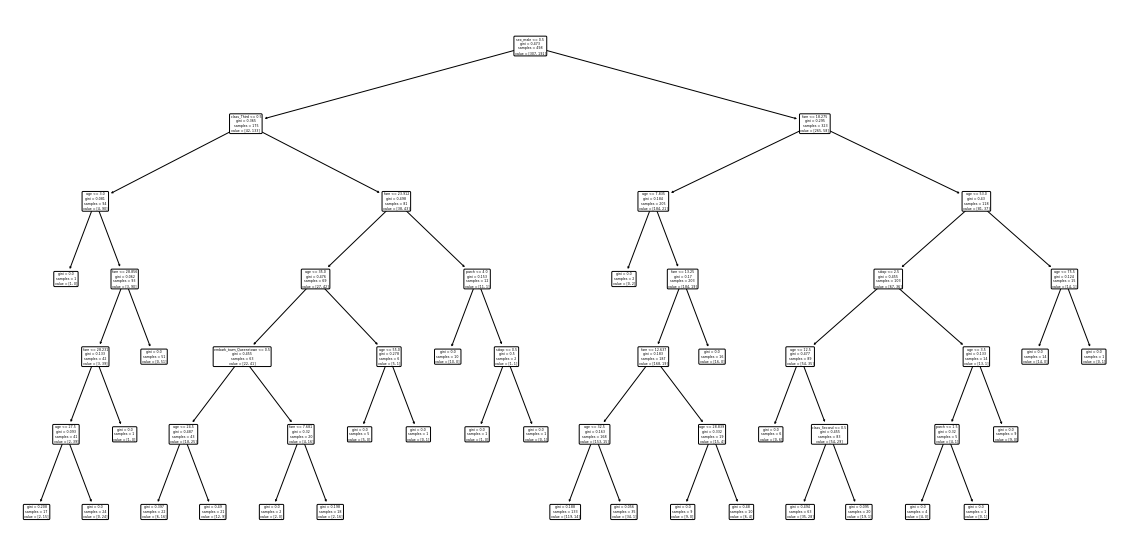

In [121]:
clf = DecisionTreeClassifier(max_depth=6, random_state=123)
clf = clf.fit(X_train, y_train)
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X_train.columns, rounded=True)

In [122]:
y_pred = clf.predict(X_train)
y_pred[0:5]

array([0, 1, 0, 1, 1])

In [123]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.55555556, 0.44444444],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ]])

In [124]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.87


In [125]:
confusion_matrix(y_train, y_pred)

array([[297,  10],
       [ 57, 134]])

In [126]:
labels = sorted(y_train.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=['predict_died', 'predict_survived'], columns=['actual_died', 'actual survived'])

,actual_died,actual survived
predict_died,297,10
predict_survived,57,134


In [127]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90       307
           1       0.93      0.70      0.80       191

    accuracy                           0.87       498
   macro avg       0.88      0.83      0.85       498
weighted avg       0.87      0.87      0.86       498



In [128]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on validate set: 0.79


In [129]:
y_pred = clf.predict(X_validate)
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       132
           1       0.76      0.63      0.69        82

    accuracy                           0.79       214
   macro avg       0.78      0.76      0.76       214
weighted avg       0.78      0.79      0.78       214



In [ ]:
# When changing the max_depth from 3 to 6 overfits the model as the accuracy drops 10% 
# from the train dataset to the validate dataset. The first model (max_depth=3) is better
# as overall accuracy is 83% in train and 80% in validate. This indicates overfitting is
# not very present in the first model